In [1]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [7]:
# examining the raw data ,offline ,indicates '?" for missing values
df = pd.read_csv("Auto.csv" , na_values = "?")


In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


- Note that the feature Horsepower has 5 Null values

In [9]:
# dropping the Null values:
df = df.dropna(axis = 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


#### Data Set description

**Variable** | **__ Description__** |** Type**
---|---|---
mpg|Miles Per Gallon|Integer
cylinders|Number of cylinders between 4 and 8|Integer
displacement|Engine Displacement,Cu Inches|Integer
horsepower|Horsepower|Integer
weight|Vehicle weight(lbs)|Integer
acceleration|Time to accelerate from 0 to 60 mph (Secs)|float
year|Model year|Year of the Model
origin|Origin of car (1. American, 2. European, 3. Japanese|qualitative
name|Vehicle Name|String


- Dependent variable- mpg 
- Problem - to predict mpg 

## Exploratory Data Analysis

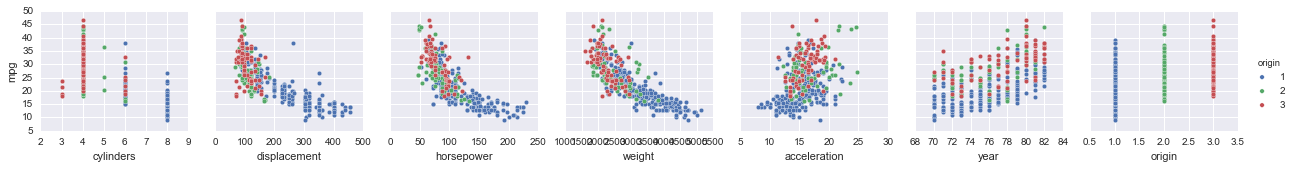

In [16]:
xvar = ["cylinders" ,"displacement","horsepower" ,"weight","acceleration","year","origin"]
yvar = "mpg"

sns.pairplot(data = df , x_vars = xvar , y_vars = yvar , hue = 'origin')

 Few observations:
 - Cars with origin =1(American) seem to have the maximum displacement, HP and weight and min acceleration and mileage
 - post 1978 , the dataset has less number of Merican car, this could be a general trend or data sampling related issue
 - plots of HP,displacement,weight are very similar indicating some degree of correlation

In [17]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


- Corrrelation values indeed confirm association between HP,displacement,weight

## Modeling

In [18]:
#Default Model - with all the features
model_sm = smf.ols(formula = 'mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',data =df).fit()

In [19]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 15 Sep 2016   Prob (F-statistic):          2.04e-139
Time:                        13:00:43   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# evaluating the fit after removing the collinear feature

In [21]:
model_trunc = smf.ols(formula = 'mpg~displacement+acceleration+year+origin',data =df).fit()

In [22]:
model_trunc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     296.2
Date:                Thu, 15 Sep 2016   Prob (F-statistic):          2.49e-116
Time:                        13:04:18   Log-Likelihood:                -1086.5
No. Observations:                 392   AIC:                             2183.
Df Residuals:                     387   BIC:                             2203.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -22.2391      4.824     -4.610      0.000       -31.723   -12.755
displacement    -0.0464      0.003    -15.965      0.000        -0.052    -0.041
acceleration    -0.1161      0.087     -1.335      0.183        -0.287     0.055
year             0.7176      0.058     12.382      0.000         0.604     0.832
origin           1.2602      0.315      3.995      0.000         0.640     1.880
==============================================================================
Omnibus:                       30.770   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.681
Skew:                           0.459   Prob(JB):                     1.10e-13
Kurtosis:                       4.676   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Acceleration can be disregarded because of high p value(H0 is true for acceleration)
- The quality of the fit has gone down considerably indicating by eliminating the corelated variables
- The year variable is statistically significant and suggests that keeping all other features constant the the miles driven per gallon of fuel incrases by .71 for a newer call

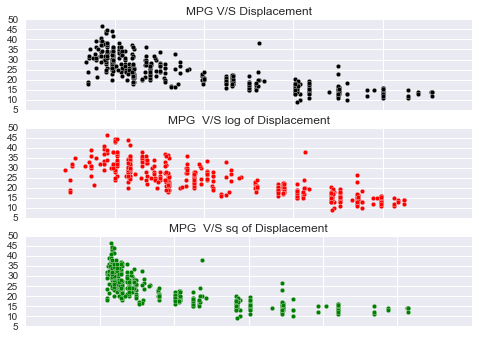

In [71]:
# revisiting the plots
#plt.scatter(x = (df.displacement) , y = df.mpg , color = 'k')

# Subplot2 grid

ax1 = plt.subplot2grid((3,1) , (0,0) ,rowspan = 1 , colspan = 1)
ax1.scatter(x = df.displacement ,y = df.mpg, c = 'k' )
ax1.set_title('MPG V/S Displacement')
plt.setp(ax1.get_xticklabels() , visible = False)

ax2 = plt.subplot2grid((3,1) , (1,0) ,rowspan = 1 , colspan = 1)
ax2.scatter(x = np.log(df.displacement), y = df.mpg, c = 'r')
ax2.set_title('MPG  V/S log of Displacement')
plt.setp(ax2.get_xticklabels() , visible = False)

ax3 = plt.subplot2grid((3,1) , (2,0) ,rowspan = 1 , colspan = 1)
ax3.scatter(x = df.displacement**2, y = df.mpg, c = 'g')
ax3.set_title('MPG  V/S sq of Displacement')
plt.setp(ax3.get_xticklabels() , visible = False)



plt.show()

- As is eveident from the subplots above , taking a sqrt of displacement would make the data non linear

In [67]:
model_transf = smf.ols(formula = 'mpg~np.log(displacement)+year+origin',data =df).fit()

In [68]:
model_transf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     496.2
Date:                Thu, 15 Sep 2016   Prob (F-statistic):          2.19e-132
Time:                        15:10:53   Log-Likelihood:                -1052.2
No. Observations:                 392   AIC:                             2112.
Df Residuals:                     388   BIC:                             2128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               18.5653      5.386      3.447      0.001         7.976    29.155
np.log(displacement)   -10.0556      0.476    -21.116      0.000       -10.992    -9.119
year                     0.7346      0.052     14.156      0.000         0.633     0.837
origin                   0.4015      0.302      1.328      0.185        -0.193     0.996
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.520
Skew:                           0.312   Prob(JB):                     3.64e-20
Kurtosis:                       5.257   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
df['df_log'] = np.log(df.displacement)

Model finding-
- approx 80% of varation in Mpg can be explained by the Model


## Checking Modeling Assumptions

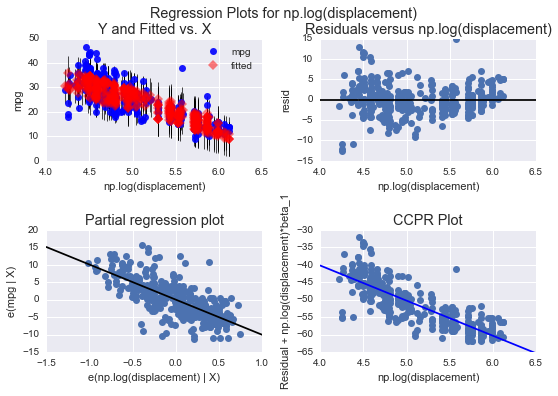

In [70]:
# examining the residuals

fig = sm.graphics.plot_regress_exog(model_transf, 'np.log(displacement)')
fig.size = (20,10)

#### Fitted values V/s the Feature

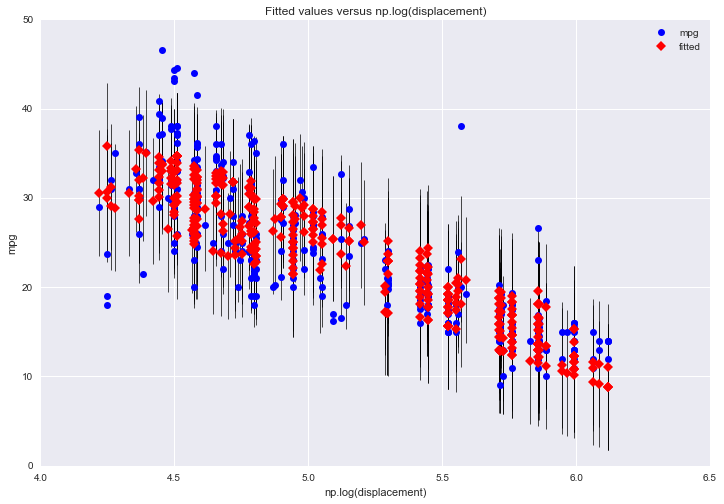

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_transf, "np.log(displacement)", ax=ax)

### Checking for Outliers

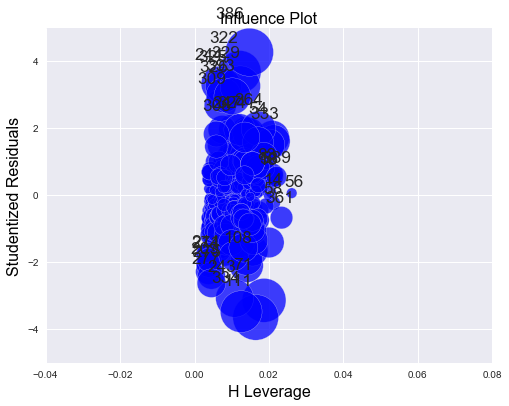

In [75]:


fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(model_transf, ax=ax)



- Fitted values are fairly close to the actual values
- There is no eveidence for a potential outlier

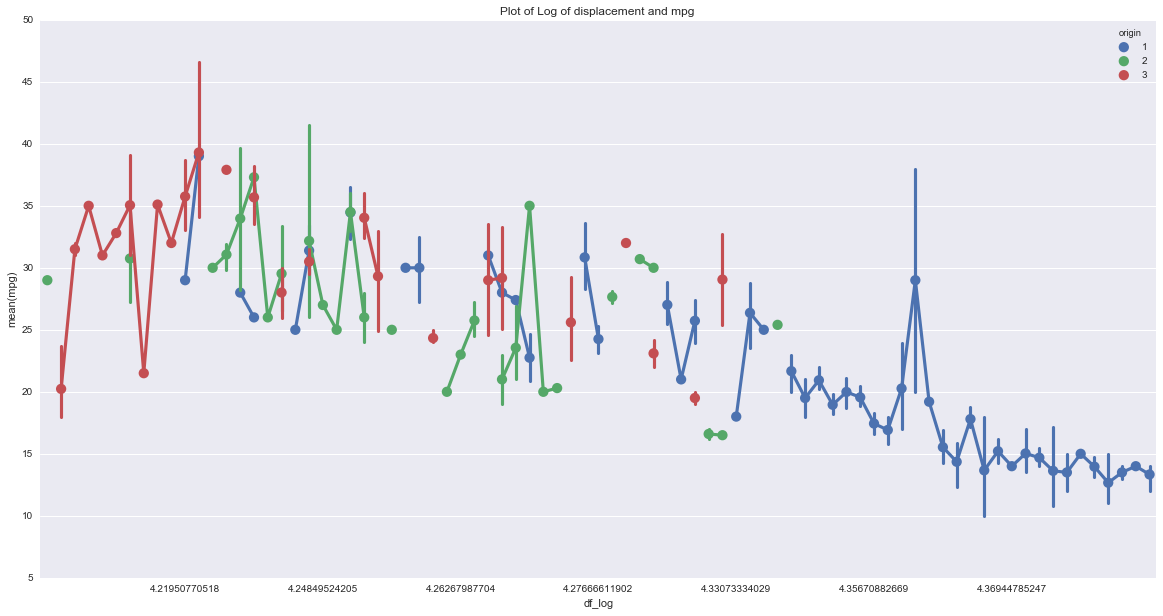

In [84]:
plt.figure(figsize = (20,10))
g = sns.pointplot(x = df.df_log , y = df.mpg, hue = 'origin' , data = df)
g.set_xticks([10 , 20 , 30 , 40 , 50, 60 , 70 ])# This limits the labels on the x axes
g.set_title('Plot of Log of displacement and mpg ')

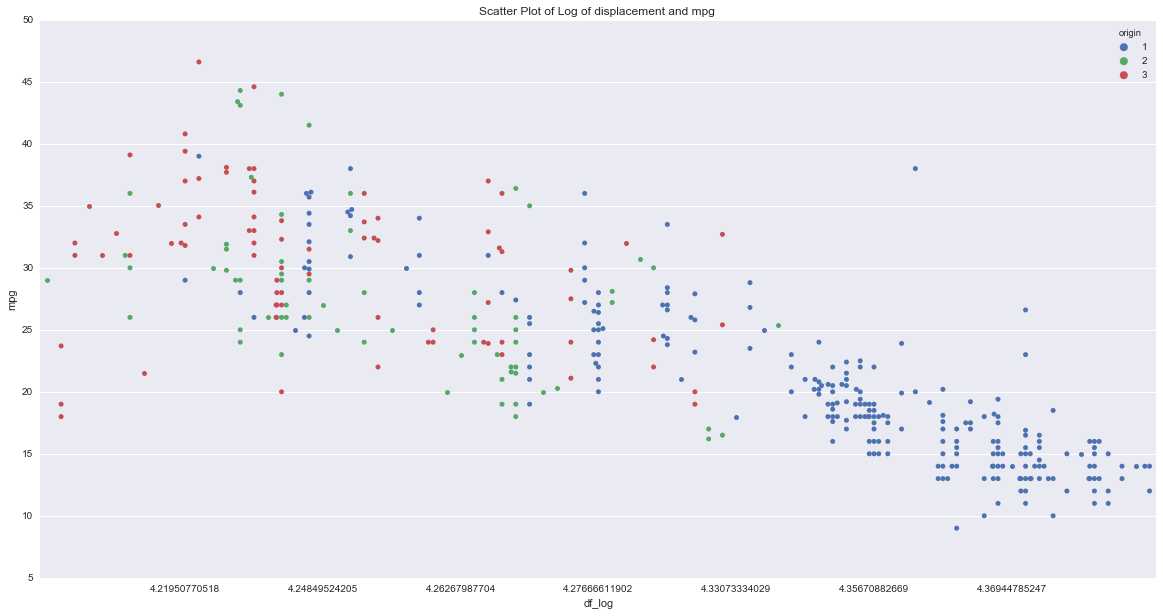

In [90]:
plt.figure(figsize = (20,10))
g = sns.swarmplot(x = df.df_log , y = df.mpg, hue = 'origin' , data = df)
g.set_xticks([10 , 20 , 30 , 40 , 50, 60 , 70 ])# This limits the labels on the x axes
g.set_title('Scatter Plot of Log of displacement and mpg ')


## Conclusion
- Japanse cars consistently deliver high mileage in the lower displacement categories
- There are very few non US cars with higher displacement and as is eveident from the coefficients this has a negative corelation with mpg